In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
dummies = pd.get_dummies(df.Gender)  #Creating one-hot encoded data for the Gender Column

In [5]:
df = pd.concat([df,dummies],axis=1)   #Concatenating the dummies with the original dataframe

In [6]:
df = df.drop('Gender',axis=1)       #Dropping the original gender variable

In [7]:
df.head()

,Height,Weight,Female,Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1


In [8]:
cols = ['Height','Female','Male','Weight']
df = df[cols]              #Rearranging the columns

In [9]:
df.head()

,Height,Female,Male,Weight
0,73.847017,0,1,241.893563
1,68.781904,0,1,162.310473
2,74.110105,0,1,212.740856
3,71.730978,0,1,220.042470
4,69.881796,0,1,206.349801


In [10]:
df.describe()

,Height,Female,Male,Weight
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,0.500000,0.500000,161.440357
std,3.847528,0.500025,0.500025,32.108439
min,54.263133,0.000000,0.000000,64.700127
25%,63.505620,0.000000,0.000000,135.818051
50%,66.318070,0.500000,0.500000,161.212928
75%,69.174262,1.000000,1.000000,187.169525
max,78.998742,1.000000,1.000000,269.989699


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Female  10000 non-null  uint8  
 2   Male    10000 non-null  uint8  
 3   Weight  10000 non-null  float64
dtypes: float64(2), uint8(2)
memory usage: 175.9 KB


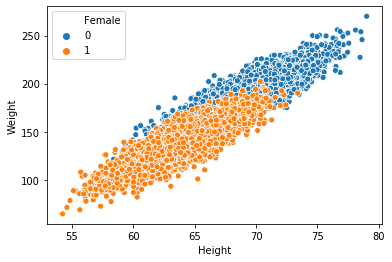

In [12]:
sns.scatterplot(x='Height',y='Weight',hue='Female',data=df)

In [13]:
X = df.drop('Weight',axis=1).values
y = df['Weight'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
X_train.shape
X_train

array([[65.28925911,  1.        ,  0.        ],
       [62.73928093,  1.        ,  0.        ],
       [63.46342933,  1.        ,  0.        ],
       ...,
       [64.3254058 ,  1.        ,  0.        ],
       [69.07449203,  0.        ,  1.        ],
       [67.58883983,  1.        ,  0.        ]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print("Train")
print(X_train)
print("Test")
print(X_test)

Train
[[0.44575922 1.         0.        ]
 [0.34266986 1.         0.        ]
 [0.3719454  1.         0.        ]
 ...
 [0.40679299 1.         0.        ]
 [0.5987869  0.         1.        ]
 [0.53872563 1.         0.        ]]
Test
[[0.58313094 1.         0.        ]
 [0.58887576 0.         1.        ]
 [0.49058808 0.         1.        ]
 ...
 [0.39191174 1.         0.        ]
 [0.28974339 1.         0.        ]
 [0.33100505 1.         0.        ]]


In [21]:
new_model = Sequential()
new_model.add(Dense(3,activation='relu'))
new_model.add(Dense(3,activation='relu'))
new_model.add(Dense(3,activation='relu'))
new_model.add(Dense(3,activation='relu'))
new_model.add(Dense(1)) 

In [22]:
new_model.compile(optimizer='adam',loss='mse')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
stop = EarlyStopping(monitor='val_loss',patience=2) #Adding earlystopping in order to prevent our model from overfitting

In [25]:
new_model.fit(X_train,y_train,epochs=100,
         callbacks = [stop], validation_data = (X_test,y_test))

Train on 6700 samples, validate on 3300 samples
Epoch 1/100
6700/6700 [==============================] - 2s 252us/sample - loss: 26830.7587 - val_loss: 26720.7633
Epoch 2/100
6700/6700 [==============================] - 1s 93us/sample - loss: 24244.2026 - val_loss: 20207.1479
Epoch 3/100
6700/6700 [==============================] - 1s 97us/sample - loss: 11416.5336 - val_loss: 2807.4693
Epoch 4/100
6700/6700 [==============================] - 1s 95us/sample - loss: 665.7513 - val_loss: 207.8809
Epoch 5/100
6700/6700 [==============================] - 1s 93us/sample - loss: 203.9425 - val_loss: 201.6266
Epoch 6/100
6700/6700 [==============================] - 1s 95us/sample - loss: 199.8789 - val_loss: 198.5481
Epoch 7/100
6700/6700 [==============================] - 1s 110us/sample - loss: 197.0387 - val_loss: 196.4286
Epoch 8/100
6700/6700 [==============================] - 1s 95us/sample - loss: 194.4074 - val_loss: 193.8727
Epoch 9/100
6700/6700 [==============================] - 1s

In [26]:
losses = pd.DataFrame(new_model.history.history)

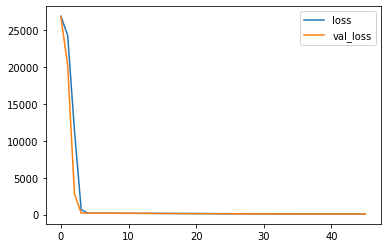

In [27]:
losses.plot()

In [28]:
predictions = new_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(y_test,predictions)     #Calculating our mean absolute error

8.020464174173306

In [31]:
pred_df = pd.DataFrame(predictions,columns=['Predictions'])

In [32]:
actual_df = pd.DataFrame(y_test,columns=['Actual'])

In [33]:
compare_df = pd.concat([actual_df,pred_df],axis=1)

In [34]:
compare_df

,Actual,Predictions
0,173.115813,165.685638
1,195.162042,187.227310
2,170.217451,173.012955
3,215.049660,205.351898
4,182.721452,176.782684
...,...,...
3295,190.584200,183.613800
3296,132.275936,141.142349
3297,127.444970,137.959457
3298,131.181930,123.145355


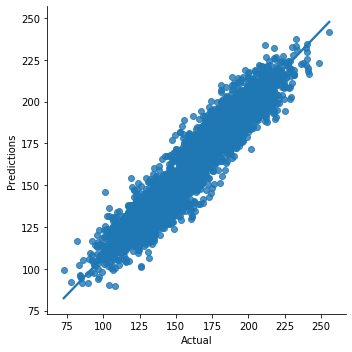

In [35]:
sns.lmplot(x='Actual',y='Predictions',data=compare_df)

## Try Entering your own height(in inches) and gender(0.0 in female and 1.0 in male if you're male and vice-versa) in the cell below and see what the model predicts.

In [36]:
my_height = 74.0  
female = 0.
male = 1.

In [37]:
unknown_data = np.array([my_height,female,male]).reshape(1,3)

In [38]:
unknown_data = scaler.transform(unknown_data)

In [39]:
new_pred = new_model.predict(unknown_data)

In [40]:
new_pred

array([[217.45831]], dtype=float32)